# 🧮 NumPy & Pandas Revision and Warm-Up

This section contains short exercises to help you revise the last session and practice some data manipulation skills before moving to machine learning.

---

In [ ]:
import numpy as np
import pandas as pd

## 🧩 Numpy Exercises

### Exercise 1: Array Creation

Please create the following two NumPy arrays using the np.array() function:

In [ ]:
# Create a NumPy array with numbers from 0 to 9
arr1D = ...

In [ ]:
# Create a 3x3 array that looks like this:
# [[5, 3, 4]
#  [1, 6, 8]
#  [2, 0, 4]
arr3D = ...

### Exercise 2: Array Indexing

Use the indexing methods that we discussed last time to solve the following exercises:

In [ ]:
# Print the second element from 'arr1D'
...

In [ ]:
# Print the 2x2 array
# [[6, 8],
#  [0, 4]]
# by using the [:, :] indexing we took a look at last time
...

### Exercise 3: Array Operations

In [ ]:
arrEx3 = np.array([5, 7, 1, 10, 5, -4, 7, -15, 3, 9])

# Calculate the element-wise sum, difference and product of
# 'arr1D' and 'arrEx3'

You can use different NumPy functions to calculate statistical measurements of an array. Try out the following functions on 'arrEx3':


*   mean()
*   median()
*   sd()



In [ ]:
# Calculate the mean, median and sd of 'arrEx3'

----

## 📊 Pandas Exercises

### Exercise 1: Creating and Inspecting DataFrames

Remember that you can create a pandas dataframe from a Python dictionary using pd.DataFrame().

In [ ]:
# Create a DataFrame with the columns: 'Name', 'Age' and 'Score' (please put at least 3 rows into the DataFrame)
dfEx1 = ...

In [ ]:
# Print the first rows of 'dfEx1' using .head()

In [ ]:
# Take a look at the statistical measurements of the DataFrame using .describe()

### Exercise 2: Indexing and Filtering

You can select one or more columns of a DataFrame using the .iloc method that we discussed last time:

```
example_df.iloc[:,0:2] # selects all rows of the first two columns
```



In [ ]:
# Select the first two columns of 'dfEx1' using .iloc
...

In [ ]:
# Select the first row of 'dfEx1' using .iloc
...

You can also use logical evaluations to filter the DataFrame like so

```
example_df[example_df['age'] > 18]   # Selects every row where 'age' > 18
```



In [ ]:
# Select every row of 'dfEx1', where age is > 1
...

In [ ]:
# Choose two names that are in 'dfEx1' and filter out the corresponding rows
...

-----

# 🧠 A Gentle Introduction to Machine Learning: Perceptron and KNN

Machine Learning (ML) is about teaching computers to learn patterns from data and make predictions or decisions **without being explicitly programmed** for every case.

## 🎯 What You'll Learn

In this notebook, we will explore:

- What a simple **classification** task looks like  
- How to **load and explore data**
- How to train two fundamental ML models:
  - **Perceptron**
  - **K-Nearest Neighbors (KNN)**
- How to **evaluate model performance**

We will show the principles and steps on a guided example (the **Iris dataset**) and you will have to get the chance to practice the same steps on a second dataset (the **Wine dataset**).

---

## 🧭 Supervised vs. Unsupervised Learning

Machine Learning algorithms can be broadly divided into **two main types**:

### 🌀 Supervised Learning
In **supervised learning**, we try to each the algorithms by using *labeled data* — data where we already know the correct answer.

- The model learns how to map the **input data** to the **correct output (label)**
- After training, the model should be able to predict the **correct label** on previously **unseen data**.

#### Examples:
| Task | Input (Features) | Output (Label) |
|------|------------------|----------------|
| Email filtering | Email text | Spam / Not spam |
| Flower classification | Petal and sepal measurements | Flower species |
| House price prediction | Size, location, number of rooms | Price |

There are two main types of supervised learning:
- **Classification:** Predict *categories* (e.g., flower species, spam vs. not spam).
- **Regression:** Predict *continuous values* (e.g., prices, temperatures).

### 🌀 Unsupervised Learning
In **unsupervised learning**, the data has **no labels** — the algorithm must discover patterns or structure on its own.

- It looks for **similarities** or **groups** in the data.

----

## 🔑 Two more key terms
- **Features:** The input data (e.g., sepal length, sepal width).  
- **Labels:** What we want to predict (e.g., flower species).

Let's get started!

----

In [ ]:
# essential imports
import seaborn as sns

from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

## 🌸 Load and Explore the Iris dataset

We will start with the Iris dataset — a classic small dataset containing measurements of iris flowers from three species. Usually, data is loaded from various file formats (like .csv or .xlsx files). However, *scikit-learn* also provides the possibility to directly load some of the more common datasets - which we will use for convenience.

In [ ]:
iris_data = load_iris(as_frame=True)
iris_df = iris_data.frame               # Extract the pandas dataframe from the larger 'iris_data' object
iris_df.head()

In [ ]:
iris_df.info()

In [ ]:
iris_df.describe()

In [ ]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="target",
                palette=["red", "green", "blue"])

## 🍷 Load and Explore the Wine dataset

Now it's your turn: Load the wine dataset from *sklearn* using the *load_wine* function and answer the following questions:

- How many features (input variables) does the wine dataset have?
- Which datatypes do the features of the wine dataset have?
- What is the mean value of the feature *ash*?
- What is the min value of the feature *flavanoids*?

Also visualize two of the features using the pre-written codeblock below.

In [ ]:
iris_data = ... # LOAD WINE DATE HERE
iris_df = ... # EXTRACT PANDAS DATAFRAME FROM 'wine_data' OBJECT
# PRINT FIRST 10 ROWS (HINT: param 'n')

In [ ]:
# CODE BLOCK FOR QUESTION 2
...

In [ ]:
# CODE BLCOK FOR QUESTION 3 and 4
...

In [ ]:
# SEABORN SCATTERPLOT OF TWO VARIABLES HERE
sns.scatterplot(data=..., x="...", y="...", hue="target",
                palette=["red", "green", "blue"])

## ✂️ Split Iris dataset into Training and Test Sets

In machine learning, the given data is usually split into two separate sets:

- The **training set** is given to the algorithm to learn the patterns and the mapping between the features and the label.
- The **test set** is used to estimate the performance of our trained model on **unseen data**.

The model **must not** see the test data until the very end to keep the model unbiased and gain a reliable estimation of our model's performance.

----

There are various splits you can perform on the original data. We will perform a so-called 80/20 split, which means that we will use 80% of the given data as our training data. The remaining 20% will stay beside as our test set.

In [ ]:
# split the features from the target variable (label)
iris_X = iris_df.iloc[, :-1] # equivalent to iris_df.loc[:, iris_df.columns != 'target']
iris_y = iris_df["target"]

In [ ]:
# Which python feature can we see here?
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

print("Train shape:", X_train_iris.shape)
print("Test shape:", X_test_iris.shape)

## ✂️ Split Wine dataset into Training and Test Sets

In [ ]:
wine_X = ... # SPLIT THE FEATURES FROM THE TARGET VARIABLE
wine_y = ...

In [ ]:
# PERFORM A 90/10 SPLIT
X_train_wine, X_test_wine, y_train_wine, y_test_wine = ...

print("Train shape:", X_train_wine.shape)
print("Test shape:", X_test_wine.shape)

How many observations are in the test set? Make sure it is really 10% of the observations.

## ⚙️ The Perceptron Algorithm for Iris dataset

The **Perceptron** is one of the most basic machine learning algorithm out there. Although it is primarily used for **binary classification** (classification with two possible labels), we will try to apply it today as our first algorithm (since we are not aiming for particularly great models but rather understand the basic process of machine learning).

The perceptron works as follows: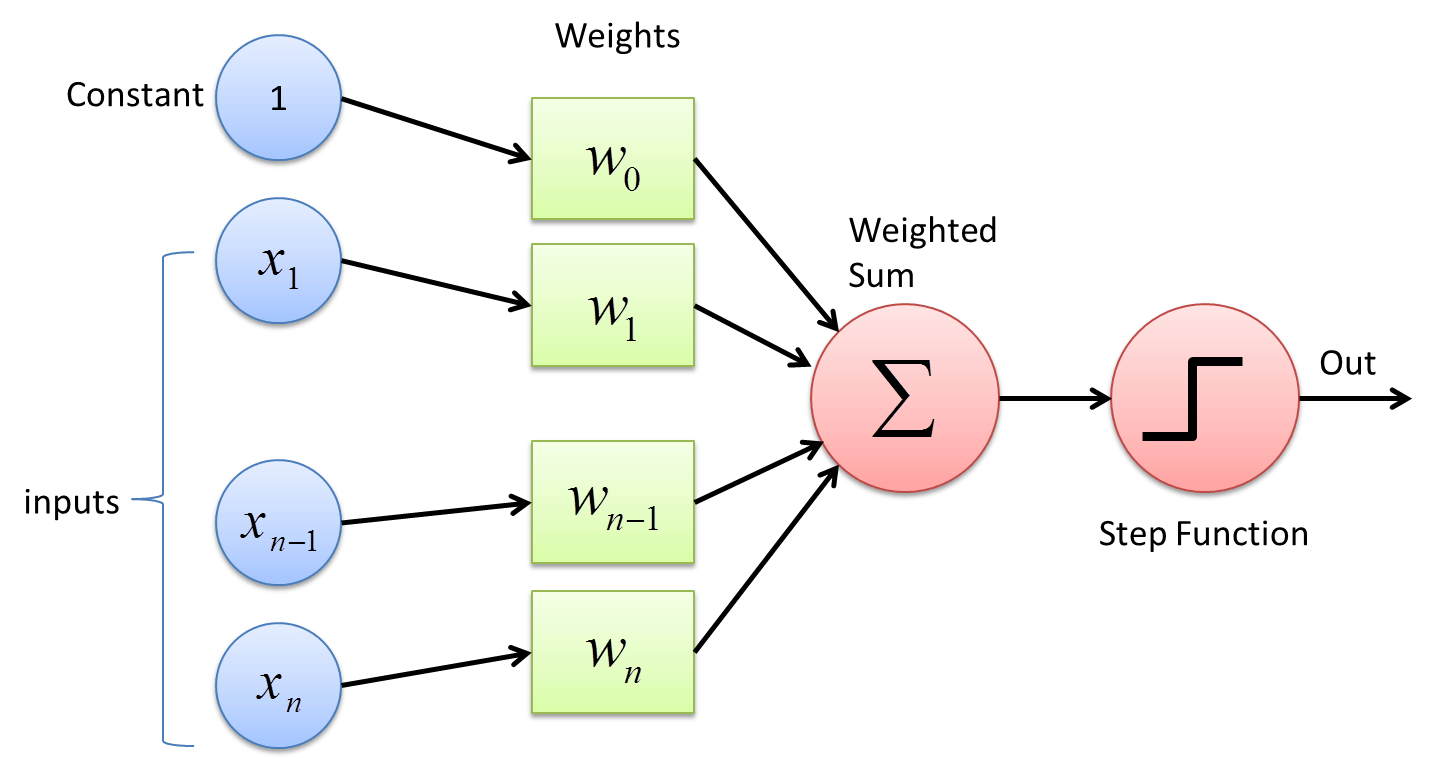

Now it is time to train our very first model on the Iris dataset.

In [ ]:
iris_perceptron = Perceptron()                    # Initialize the Perceptron algorithm
iris_perceptron.fit(X_train_iris, y_train_iris)   # start the learning process

After training the model, we can check the performance on the test set using different evaluation metrics. For now, we will stick to the accuracy, which is the number of correctly predicted samples divided by the total number of samples.

In [ ]:
print(f"Accuracy: {accuracy_score(y_test_iris, iris_perceptron.predict(X_test_iris))}")

## ⚙️ The Perceptron Algorithm for Wine dataset

In [ ]:
... # TRAIN A PERCEPTRON ON THE WINE DATASET AND REPORT ITS ACCURACY ON THE TEST SET

Is the Accuracy better than with the Iris dataset?

## ⚙️ The k-Nearest Neighbor Algorithm (KNN) for Iris dataset
The **k-Nearest Neighbor (KNN)** is also a simple machine learning algorithm, which looks at the "distance" between samples.

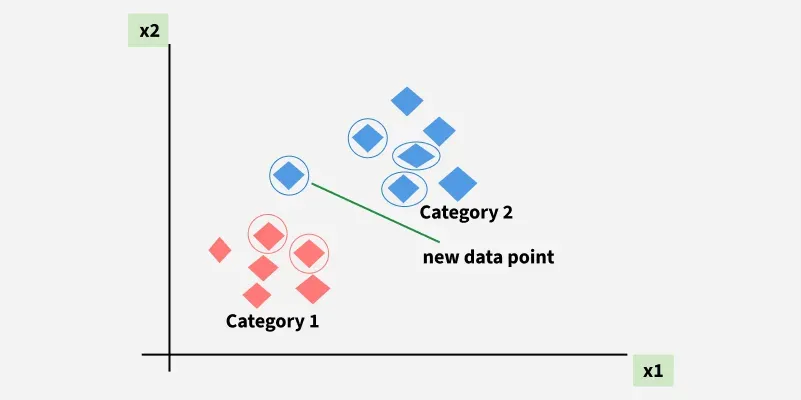

Examples for distance functions are:

- **Euclidean Distance:** $D=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...(x_n-y_n)^2}$
- **Manhattan Distance:** $D=|x_1-y_1|+|x_2-y_2|+...+|x_n-y_n|$

Now its again time to try KNN on our Iris dataset:

In [ ]:
iris_knn = KNeighborsClassifier(n_neighbors=10)
iris_knn.fit(X_train_iris, y_train_iris)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test_iris, iris_knn.predict(X_test_iris))}")

## ⚙️ The k-Nearest Neighbor Algorithm (KNN) for Wine dataset



In [ ]:
... # TRAIN A KNN CLASSIFIER WITH 10 NEIGHBORS ON THE WINE DATASET AND REPORT ITS ACCURACY

In [ ]:
... # TRAIN TWO MORE CLASSIFIERS WITH OTHER NUMBERS OF NEIGHBORS. DOES THE ACCRUACY CHANGE?

## ➕ Additional Exercise

Repeat today's process with the Multiclass Diabetes Dataset and experiment with all topics that we have discussed today(numpy, pandas, ML introduction). If you are interested, you can read more about the data and certain features on the Kaggle website:

- [Multiclass Diabetes Dataset](https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset)

In [ ]:
url = "https://raw.githubusercontent.com/RogueRefiner/TU_UA/main/Lecture_03/diabetes.csv"
diabetes_df = pd.read_csv(url)